# Capital Asset Pricing Model (CAPM) with Python.

This notebook is replication of the notebook(https://github.com/aldodec/Capital-Asset-Pricing-Model-CAPM-with-Python/tree/master) and I have made improvements as part of learning process.  It is devoted to exploring some aspects of the Capital Asset Pricing Model (CAPM) using Python. According to CAPM, the expected return of a particular investment
$E[r_a]$ is given the following equation:

$$E[r_a]=r_f+\beta_a(E[r_m]-r_f)$$

where $r_f$ is the a risk free return (like goverment bond returns), $E[r_m]$ is the expected return from the market, usually measured by the return on some index like S&P 500, and $\beta_a$ measures the volatility of the investement with respect to the market, and is formally given by:

$$\beta_a = \frac{\mathrm{Cov}(r_a, r_m)}{\mathrm{Var}(r_m)}$$

We can see $\beta_a$ is the coefficient in the standard linear regression model.  Geometrically, it is the projection of the asset return $r_a$ to the market return $r_m$.  As we recall from Chapter 3 of the element of statistical learning, for a regression model of the form $y=X\beta+\epsilon$, the estimated coefficient $\hat{\beta}$ is given by $(X^TX)^{-1}X^Ty$ (We are writing everything in vector form).  The variance of coefficients $\hat{\beta}$ is given by:

$$\mathrm{Var}(\hat{\beta}) = (X^TX)^{-1}\sigma^2$$

With this set up, the prediction $\hat{y}=X\hat{\beta}=X(X^TX)^{-1}X^Ty=Hy$, where we define $H=X(X^TX)^{-1}X^T$ as the projection matrix.

In the particular case of a univariate model with no intercept, we have $y=X\beta + \epsilon$ and the estimated coefficient $\hat{\beta}$ is given by

$$\hat{\beta}=\frac{\sum^N_i x_iy_i}{\sum^N_i x_i^2}=\frac{\langle x, y\rangle}{\langle x, x\rangle}=\frac{x^Ty}{x^Tx}$$

Now we can compare the least square estimate $\hat{\beta}$ with the $\beta_a$.

In the particular case of orthogonal features $x_i$'s, we have

$$\hat{\beta}_{p}=\frac{\langle x_{p}, y\rangle}{\langle x_{p}, x_{p}\rangle},$$

and

$$\mathrm{Var}(\hat{\beta}_p) = \frac{\sigma^2}{\langle z_p, z_p \rangle}=\frac{\sigma^2}{||z_p||^2}$$

where we denote $x_p$ as the orthogonalised features.

Thus, the model assumes a linear relationship between $E[r_a]$ and the quantity
($E[r_m]-r_f$), also called as the market premium, which is mediated by the coefficient $\beta_a$. As we can see, the sign of $\beta_a$ dictates whether a given asset is positively or negatively correlated with the market return.  

From basic finance (See Financial Market course by Yale at coursera), assets such as gold, would have negative $\beta_a$ as they are negatively correlated with the equity market return (stronger equity market draws investment from gold market and vice versa).  On the other hand, many assets have positive correlation with the market return.  One example is Apple stock, which we will explore in later sections.

If we would like to measure all the returns in the model with respect to the risk free rate $r_f$ and thus construct a linear regression between the quantities $(E[r_a]-r_f)$ and the market premium $(E[r_m]-r_f)$, one must the pose this relationship as:

$$(E[r_a]-r_f) = \alpha + \beta_a(E[r_m]-r_f)$$

In this manner, $\alpha$ meassures the difference between the expected return
$E[r_a]$ as measured in real life, and the expected return of our investment as given by the CAPM:

$$\alpha = E[r_a]- (r_f + \beta_a(E[r_m]-r_f))$$

Now that we have familiar ourselves with $\alpha$ and $\beta$ and their intuitive meaning, let's get some hands-on experience in Python

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

We will use ^GSPC to compute $E[r_m]$ and set $r_f=0$, for simplicity.  This assumption means that ^GSPC return is the baseline return and we do not make any profit from the risk free investment.

Let us then apply the CAPM to apple stocks. To capture less noise in our construction, we will focus on monthly returns.

In [28]:
stock_a = ['AAPL']
stock_m = ['^GSPC']

start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2018-01-01')

data_a = yf.download(stock_a, start=start, end=end)['Close']
data_m = yf.download(stock_m, start=start, end=end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


We now calculate the monthly returns:

In [46]:
M_stock_a = data_a['AAPL'].resample('ME').last()
M_stock_m = data_m['^GSPC'].resample('ME').last()

data = pd.DataFrame({'Inv_Close': M_stock_a, 'Market_Close': M_stock_m})
data.head()

,Inv_Close,Market_Close
Date,,
2015-01-31,26.028084,1994.989990
2015-02-28,28.651100,2104.500000
2015-03-31,27.752274,2067.889893
2015-04-30,27.912855,2085.510010
2015-05-31,29.178400,2107.389893


In the following, we calculate the log return of apple and the market:

In [68]:
data[['Inv_Ret','Markt_Ret']] = np.log(data[['Inv_Close','Market_Close']]/data[['Inv_Close','Market_Close']].shift(1))
data.dropna(inplace=True)
data.head()

,Inv_Close,Market_Close,Inv_Ret,Markt_Ret
Date,,,,
2015-02-28,28.651100,2104.500000,0.096016,0.053439
2015-03-31,27.752274,2067.889893,-0.031874,-0.017549
2015-04-30,27.912855,2085.510010,0.005770,0.008485
2015-05-31,29.178400,2107.389893,0.044341,0.010437
2015-06-30,28.092159,2063.110107,-0.037938,-0.021236


Now we do a scatter plot of market return vs apple return:

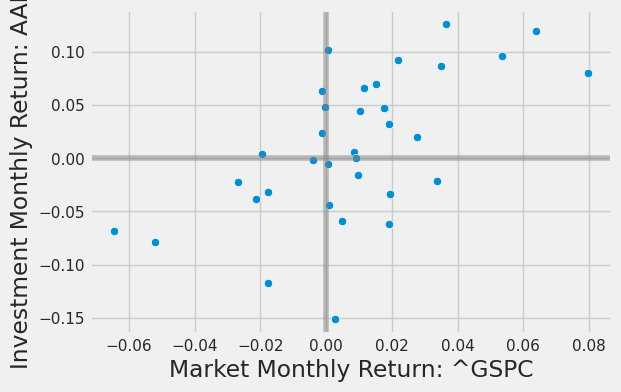

In [74]:
plt.figure(figsize = (6,4))

plt.axvline(0, color='grey', alpha = 0.5)
plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data)
plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))
plt.show()

From the plot, we can clearly see that $\beta^{\text{AAPL}}_a$ is positive and apple return is positively correlated with the market return

In [71]:
beta_form = (data[['Inv_Ret','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
print('Beta from CAPM formula: ',beta_form.round(4))

Beta from CAPM formula:  1.4373


In [72]:
beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1)
print('Beta from Linear Regression: ',beta_reg.round(4))
print('Alpha: ', alpha.round(3))

Beta from Linear Regression:  1.4373
Alpha:  0.0


From above comparision, we see numerically, the $\beta_a$ from CAPM formula is the same as the $\beta$ from the linear regression as discussed above.

Now our $\beta_a>1$. What does this mean? Let's discuss the quantitative meaning of $\beta_a$ below.

We first assume $\beta_a>0$ and the $\beta_a< 0$ is similar, the only difference is in the $\beta_a < 0$ case the asset price is negatively correlated with the market.

For $\beta_a>1$, the asset price fluctuates more than the market price fluctuate.  Say, if $\beta_a=2$, then if the market price changes by $10\%$, then the asset price changes by $20\%$.  So if we want to invest in assets that move strongly with the market, we can consider assets with large positive $\beta_a$.

For $\beta_a=1$, the asset price fluctates the same way as the market price.

For $\beta_a < 1$, the asset price fluctuates less than the market price fluctuate.  Say, if $\beta_a=1/2$, then if the market price changes by $10\%$, then the asset price changes by $5\%$.  So if we want to invest in assets that move weakly with the market, we can consider assets with large positive $\beta_a$.

If we are an investor, we can use the value of $\beta_a$ to choose assets depending on our preferences.

Now we assume we want to invest in assets that move positively with the market.

For example, if we are happy with taking risks and want to have high return when the market is strong, we can choose assets with large positive $\beta_a$. A large positive $\beta_a$ will allow us to get higher returns than the market return.

On the another hand, if we are risk averse and want our profolio to be as stable as possible regardless of the market behaviour, we want to choose assets with low positive $\beta_a$.  Then our investment will have less volatility than the market.

Overall, as investors, we want to minimise our risks.  What we could do is to have a profolio with some assets with positive $\beta$ and some assets with negative $\beta$.  In this way, we can minimise our risk with respect to the market fluctuation.

Finally, we plot our returns scatter plot along with the CAPM line.
The slope of the red fitted line is the $\beta_a$ for AAPL.

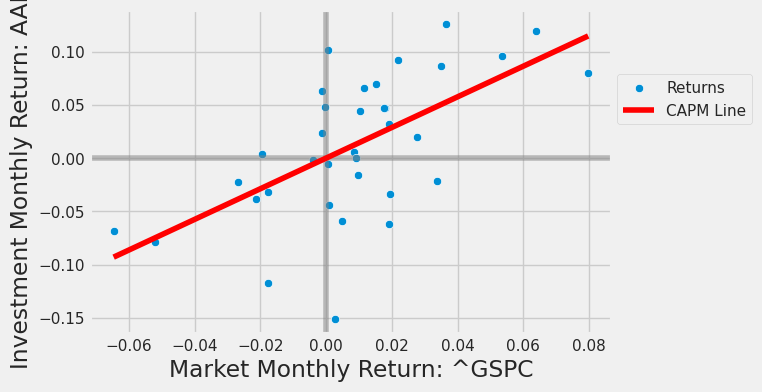

In [75]:
plt.figure(figsize = (6,4))

plt.axvline(0, color='grey', alpha = 0.5)
plt.axhline(0, color='grey', alpha = 0.5)

sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data, label = 'Returns')
sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')



plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))

plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

plt.show()

In [114]:
def CAPM(stock_a, stock_m, start, end):
  data_a = yf.download([stock_a], start=start, end=end)['Close']
  data_m = yf.download([stock_m], start=start, end=end)['Close']

  M_stock_a = data_a[stock_a].resample('ME').last()
  M_stock_m = data_m[stock_m].resample('ME').last()

  data = pd.DataFrame({'Inv_Close': M_stock_a, 'Markt_Close': M_stock_m})
  data.head()
  data[['Inv_Ret', 'Markt_Ret']] = np.log(data[['Inv_Close', 'Markt_Close']]/data[['Inv_Close', 'Markt_Close']].shift(1))
  data.dropna(inplace=True)

  beta_form = (data[['Inv_Ret', 'Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
  beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1)

  print('\n')
  print(20*'==')
  print('Beta from CAPM formula: ',beta_form.round(4))
  print('Beta from Linear Regression: ',beta_reg.round(4))
  print('Alpha: ', alpha.round(3))
  print(20*'==')

  plt.figure(figsize = (6,4))

  plt.axvline(0, color='grey', alpha = 0.5)
  plt.axhline(0, color='grey', alpha = 0.5)

  sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data, label = 'Returns')
  sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')

  plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
  plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))
  plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

  plt.show()

Let's replicate our above results for AAPL:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed




Beta from CAPM formula:  1.3947
Beta from Linear Regression:  1.3947
Alpha:  0.004


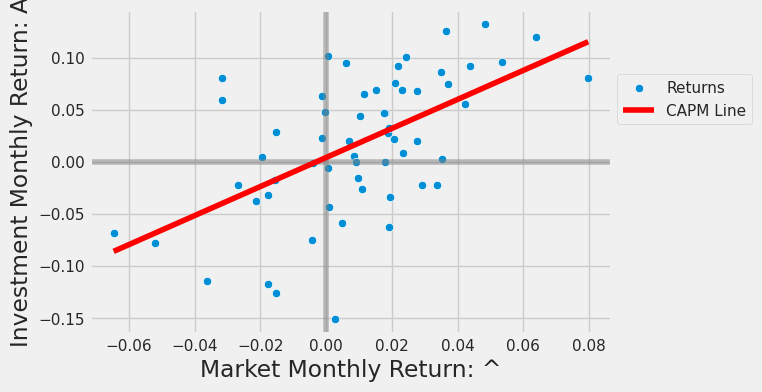

In [115]:
stock_a ='AAPL'
stock_m = '^GSPC'

start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

CAPM(stock_a,stock_m,start, end)

Below is BP stock, which has $\beta < 1$

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed




Beta from CAPM formula:  0.9522
Beta from Linear Regression:  0.9522
Alpha:  -0.005


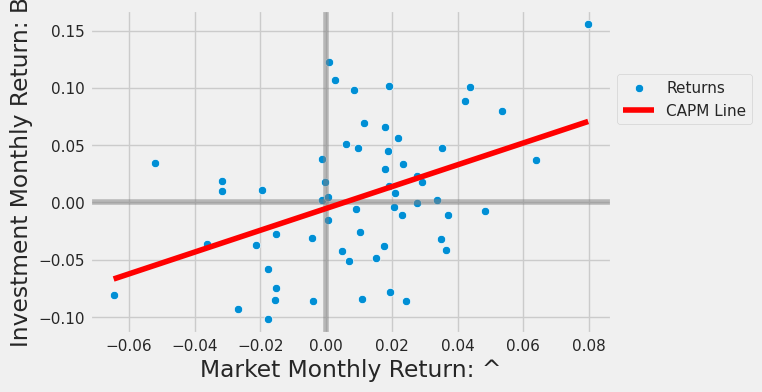

In [120]:
stock_a ='BP'
stock_m = '^GSPC'

start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

CAPM(stock_a,stock_m,start, end)

Now we show the GE stock, which has $\beta≈1$

In [ ]:
stock_a ='GE'
stock_m = '^GSPC'

start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

CAPM(stock_a,stock_m,start, end)

Now we show the AMD stock, which has a high $\beta$

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed




Beta from CAPM formula:  2.3585
Beta from Linear Regression:  2.3585
Alpha:  0.0


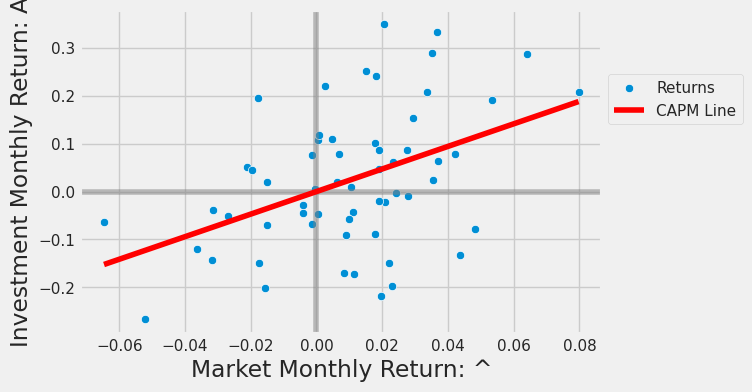

In [118]:
stock_a ='AMD'
stock_m = '^GSPC'

start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

CAPM(stock_a,stock_m,start, end)